## Exploring our dataset :

In this part of the project, we will get more familair wiht our data, perform data wrangling and exploratory data analysis as grasping the intricacies of our data is crucial to eventually perform the differnt classification algortihms.
### Polars Library :
To handle our data efficiently, we will be using Polars which is a DataFrame library completely written in Rust and is built to empower Python developers with a scalable and efficient framework for handling data and is considered as an alternative to the very popular pandas library. It provides a wide range of functionalities that facilitate various data manipulation and analysis tasks. Some of the key features and advantages of using Polars include:
- Speed and performance
- Data manipulation capabilities
- Expressive syntax
- Polars support lazy evaluation


### Why choose Polars when we have Pandas ?

pandas, a widely adopted library, is known for its flexibility and ease of use. However, when dealing with large datasets, Pandas can suffer from performance bottlenecks due to its reliance on single-threaded execution. As the dataset size increases, processing times can become prohibitively long, limiting productivity.

Polars has been specifically designed to handle large datasets efficiently. With its lazy evaluation strategy and parallel execution capabilities, Polars excels at processing substantial amounts of data swiftly. By distributing computations across multiple CPU cores, Polars leverages parallelism to deliver impressive performance gains. See the speed comparison test between Pandas and Polars by Yuki.


**Polars documentation  :** <https://docs.pola.rs> 

In [112]:
%pip install polars

Defaulting to user installation because normal site-packages is not writeable


Note: you may need to restart the kernel to use updated packages.


In [113]:
import polars as pl

print(f"[POLLARS VERSION] == {pl.__version__}")

[POLLARS VERSION] == 0.20.18


In [114]:
df = pl.read_csv("../../data/AQI_data.csv")
df

Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
str,str,i64,str,i64,str,i64,str,i64,str,i64,str,f64,f64
"""Russian Federa…","""Praskoveya""",51,"""Moderate""",1,"""Good""",36,"""Good""",0,"""Good""",51,"""Moderate""",44.7444,44.2031
"""Brazil""","""Presidente Dut…",41,"""Good""",1,"""Good""",5,"""Good""",1,"""Good""",41,"""Good""",-5.29,-44.49
"""Brazil""","""Presidente Dut…",41,"""Good""",1,"""Good""",5,"""Good""",1,"""Good""",41,"""Good""",-11.2958,-41.9869
"""Italy""","""Priolo Gargall…",66,"""Moderate""",1,"""Good""",39,"""Good""",2,"""Good""",66,"""Moderate""",37.1667,15.1833
"""Poland""","""Przasnysz""",34,"""Good""",1,"""Good""",34,"""Good""",0,"""Good""",20,"""Good""",53.0167,20.8833
…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""United States …","""Highland Sprin…",54,"""Moderate""",1,"""Good""",34,"""Good""",5,"""Good""",54,"""Moderate""",37.5516,-77.3285
"""Slovakia""","""Martin""",71,"""Moderate""",1,"""Good""",39,"""Good""",1,"""Good""",71,"""Moderate""",49.065,18.9219
"""Slovakia""","""Martin""",71,"""Moderate""",1,"""Good""",39,"""Good""",1,"""Good""",71,"""Moderate""",36.3385,-88.8513


### 1. Understanding the data structure

In [115]:
# get the dimensionality of our df
print(f"THE SHAPE OF OUR DATAFRAME == {df.shape}")
print(f"WE HAVE {df.shape[0] } ROWS AND {df.shape[1]} COLUMNS ")

THE SHAPE OF OUR DATAFRAME == (16695, 14)
WE HAVE 16695 ROWS AND 14 COLUMNS 


In [116]:
# View the top 10 rows of our df
print(df[33:40])

shape: (7, 14)
┌────────────┬────────┬───────────┬────────────┬───┬────────────┬────────────┬─────────┬───────────┐
│ Country    ┆ City   ┆ AQI Value ┆ AQI        ┆ … ┆ PM2.5 AQI  ┆ PM2.5 AQI  ┆ lat     ┆ lng       │
│ ---        ┆ ---    ┆ ---       ┆ Category   ┆   ┆ Value      ┆ Category   ┆ ---     ┆ ---       │
│ str        ┆ str    ┆ i64       ┆ ---        ┆   ┆ ---        ┆ ---        ┆ f64     ┆ f64       │
│            ┆        ┆           ┆ str        ┆   ┆ i64        ┆ str        ┆         ┆           │
╞════════════╪════════╪═══════════╪════════════╪═══╪════════════╪════════════╪═════════╪═══════════╡
│ United     ┆ Dayton ┆ 45        ┆ Good       ┆ … ┆ 45         ┆ Good       ┆ 39.7805 ┆ -84.2003  │
│ States of  ┆        ┆           ┆            ┆   ┆            ┆            ┆         ┆           │
│ America    ┆        ┆           ┆            ┆   ┆            ┆            ┆         ┆           │
│ United     ┆ Dayton ┆ 45        ┆ Good       ┆ … ┆ 45         ┆ Good      

In [117]:
# check the data types of each column
for col, dtype in zip(df.columns, df.dtypes):
    print(f"COLUMN: {col}  -> DATATYPE : {dtype}")

COLUMN: Country  -> DATATYPE : String
COLUMN: City  -> DATATYPE : String
COLUMN: AQI Value  -> DATATYPE : Int64
COLUMN: AQI Category  -> DATATYPE : String
COLUMN: CO AQI Value  -> DATATYPE : Int64
COLUMN: CO AQI Category  -> DATATYPE : String
COLUMN: Ozone AQI Value  -> DATATYPE : Int64
COLUMN: Ozone AQI Category  -> DATATYPE : String
COLUMN: NO2 AQI Value  -> DATATYPE : Int64
COLUMN: NO2 AQI Category  -> DATATYPE : String
COLUMN: PM2.5 AQI Value  -> DATATYPE : Int64
COLUMN: PM2.5 AQI Category  -> DATATYPE : String
COLUMN: lat  -> DATATYPE : Float64
COLUMN: lng  -> DATATYPE : Float64


In [118]:
# get general information about the data
df.describe()

statistic,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
str,str,str,f64,str,f64,str,f64,str,f64,str,f64,str,f64,f64
"""count""","""16393""","""16695""",16695.0,"""16695""",16695.0,"""16695""",16695.0,"""16695""",16695.0,"""16695""",16695.0,"""16695""",16695.0,16695.0
"""null_count""","""302""","""0""",0.0,"""0""",0.0,"""0""",0.0,"""0""",0.0,"""0""",0.0,"""0""",0.0,0.0
"""mean""",null,null,62.998682,null,1.342138,null,31.767355,null,3.819647,null,59.821324,null,30.267148,-3.944485
"""std""",null,null,43.091971,null,2.371379,null,22.839343,null,5.880677,null,43.208298,null,22.947398,73.037148
"""min""","""Afghanistan""","""Aabenraa""",7.0,"""Good""",0.0,"""Good""",0.0,"""Good""",0.0,"""Good""",0.0,"""Good""",-54.8019,-171.75
"""25%""",null,null,39.0,null,1.0,null,20.0,null,0.0,null,34.0,null,16.5167,-75.1779
"""50%""",null,null,52.0,null,1.0,null,29.0,null,2.0,null,52.0,null,38.8158,5.6431
"""75%""",null,null,69.0,null,1.0,null,38.0,null,5.0,null,69.0,null,46.6833,36.2833
"""max""","""Zimbabwe""","""Zyryanovsk""",500.0,"""Very Unhealthy…",133.0,"""Unhealthy for …",222.0,"""Very Unhealthy…",91.0,"""Moderate""",500.0,"""Very Unhealthy…",70.767,178.0178


### Handling missing and duplicated values

In [119]:
df.null_count()
# we have no missing values youpii :)

Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
302,0,0,0,0,0,0,0,0,0,0,0,0,0


In [120]:
df.is_duplicated().sum()

0

In [121]:
df = df.unique(subset=["City"])
df.shape

(14229, 14)

### Exploring categorical variables

In [122]:
for col in df.columns:
    print(df[col].value_counts())

shape: (175, 2)
┌─────────────────────┬───────┐
│ Country             ┆ count │
│ ---                 ┆ ---   │
│ str                 ┆ u32   │
╞═════════════════════╪═══════╡
│ Côte d'Ivoire       ┆ 26    │
│ South Sudan         ┆ 9     │
│ Angola              ┆ 21    │
│ Kingdom of Eswatini ┆ 2     │
│ Niger               ┆ 12    │
│ …                   ┆ …     │
│ Kuwait              ┆ 1     │
│ France              ┆ 439   │
│ Paraguay            ┆ 14    │
│ Malta               ┆ 6     │
│ Ireland             ┆ 25    │
└─────────────────────┴───────┘
shape: (14_229, 2)
┌────────────────┬───────┐
│ City           ┆ count │
│ ---            ┆ ---   │
│ str            ┆ u32   │
╞════════════════╪═══════╡
│ Bartow         ┆ 1     │
│ Kratovo        ┆ 1     │
│ Gramsh         ┆ 1     │
│ Las Rosas      ┆ 1     │
│ Cesano Maderno ┆ 1     │
│ …              ┆ …     │
│ Piura          ┆ 1     │
│ Shaowu         ┆ 1     │
│ Sierra Vista   ┆ 1     │
│ Markt Schwaben ┆ 1     │
│ Prudnik       

In [123]:
for col in df.columns:
    print(f"{col} -> {df[col].n_unique()}")

Country -> 175
City -> 14229
AQI Value -> 282
AQI Category -> 6
CO AQI Value -> 31
CO AQI Category -> 3
Ozone AQI Value -> 203
Ozone AQI Category -> 5
NO2 AQI Value -> 56
NO2 AQI Category -> 2
PM2.5 AQI Value -> 298
PM2.5 AQI Category -> 6
lat -> 11959
lng -> 12628


In [124]:
# Let's see the top 5 dirtiest cities
sorted_df = df.sort(by="AQI Value")
sorted_df[["Country", "City", "AQI Value"]][:6]

Country,City,AQI Value
str,str,i64
"""Ecuador""","""Macas""",7
"""Papua New Guin…","""Tari""",8
"""Ecuador""","""Azogues""",8
"""Peru""","""Huaraz""",9
"""Indonesia""","""Manokwari""",10
"""Peru""","""Huancavelica""",10


In [125]:
# Let's see the top 5 cleanest cities
sorted_df = df.sort(by="AQI Value")
sorted_df.tail(6)[["Country", "City", "AQI Value"]]

Country,City,AQI Value
str,str,i64
"""India""","""Mahendragarh""",500
"""India""","""Sardulgarh""",500
"""India""","""Ratangarh""",500
"""India""","""Jalalabad""",500
"""India""","""Maur""",500
"""Pakistan""","""Harunabad""",500


### Data Visualization :

In [126]:
%pip install seaborn
%pip install pyarrow

Defaulting to user installation because normal site-packages is not writeable


Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

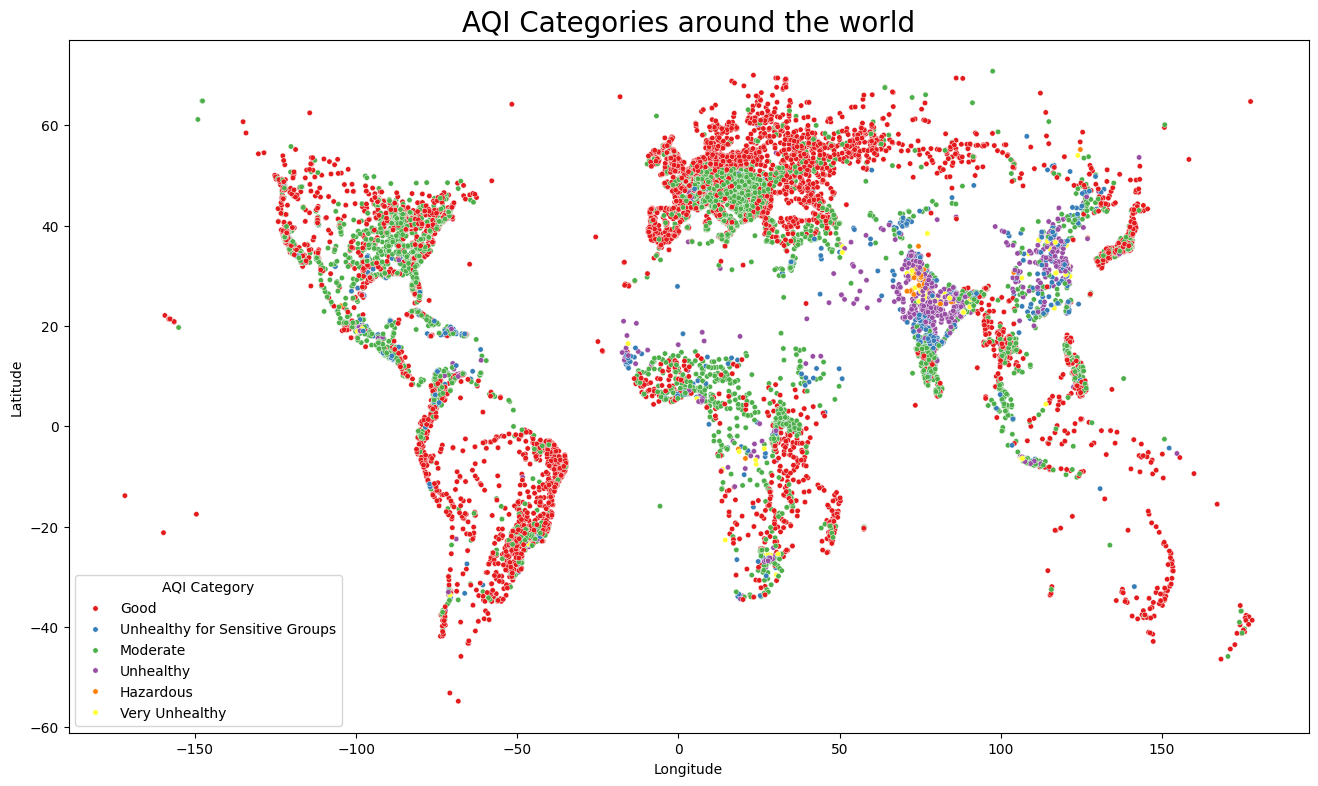

In [128]:
# Let's visualize the label of the AQI for each country in the dataset
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x="lng", y="lat", hue="AQI Category", palette="Set1", s=15)
plt.title("AQI Categories around the world", fontsize=20)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [129]:
# Now let's group the cities by countries and for each country
# get the mean of AQI scores and plot them in a histogram
grouped_countries = df.group_by("Country")

for country, content in list(grouped_countries):
    print(country, content)
    print("\n")

Senegal shape: (18, 14)
┌─────────┬────────────┬───────────┬────────────┬───┬────────────┬────────────┬─────────┬──────────┐
│ Country ┆ City       ┆ AQI Value ┆ AQI        ┆ … ┆ PM2.5 AQI  ┆ PM2.5 AQI  ┆ lat     ┆ lng      │
│ ---     ┆ ---        ┆ ---       ┆ Category   ┆   ┆ Value      ┆ Category   ┆ ---     ┆ ---      │
│ str     ┆ str        ┆ i64       ┆ ---        ┆   ┆ ---        ┆ ---        ┆ f64     ┆ f64      │
│         ┆            ┆           ┆ str        ┆   ┆ i64        ┆ str        ┆         ┆          │
╞═════════╪════════════╪═══════════╪════════════╪═══╪════════════╪════════════╪═════════╪══════════╡
│ Senegal ┆ Ziguinchor ┆ 153       ┆ Unhealthy  ┆ … ┆ 153        ┆ Unhealthy  ┆ 12.5833 ┆ -16.2667 │
│ Senegal ┆ Fatick     ┆ 135       ┆ Unhealthy  ┆ … ┆ 135        ┆ Unhealthy  ┆ 14.3333 ┆ -16.4069 │
│         ┆            ┆           ┆ for        ┆   ┆            ┆ for        ┆         ┆          │
│         ┆            ┆           ┆ Sensitive  ┆   ┆            ┆ 

/tmp/ipykernel_270850/4025383100.py:5: DeprecationWarning: `group_by` iteration will change to always return group identifiers as tuples. Pass `by` as a list to silence this warning, e.g. `group_by(['Country'])`.
  for country, content in list(grouped_countries):


In [130]:
values_count = df['Country'].value_counts().sort(by='count', descending=True)
values_count

Country,count
str,u32
"""United States …",2777
"""Germany""",1040
"""Russian Federa…",853
"""Italy""",845
"""Brazil""",784
…,…
"""Cyprus""",1
"""Aruba""",1
"""Saint Lucia""",1


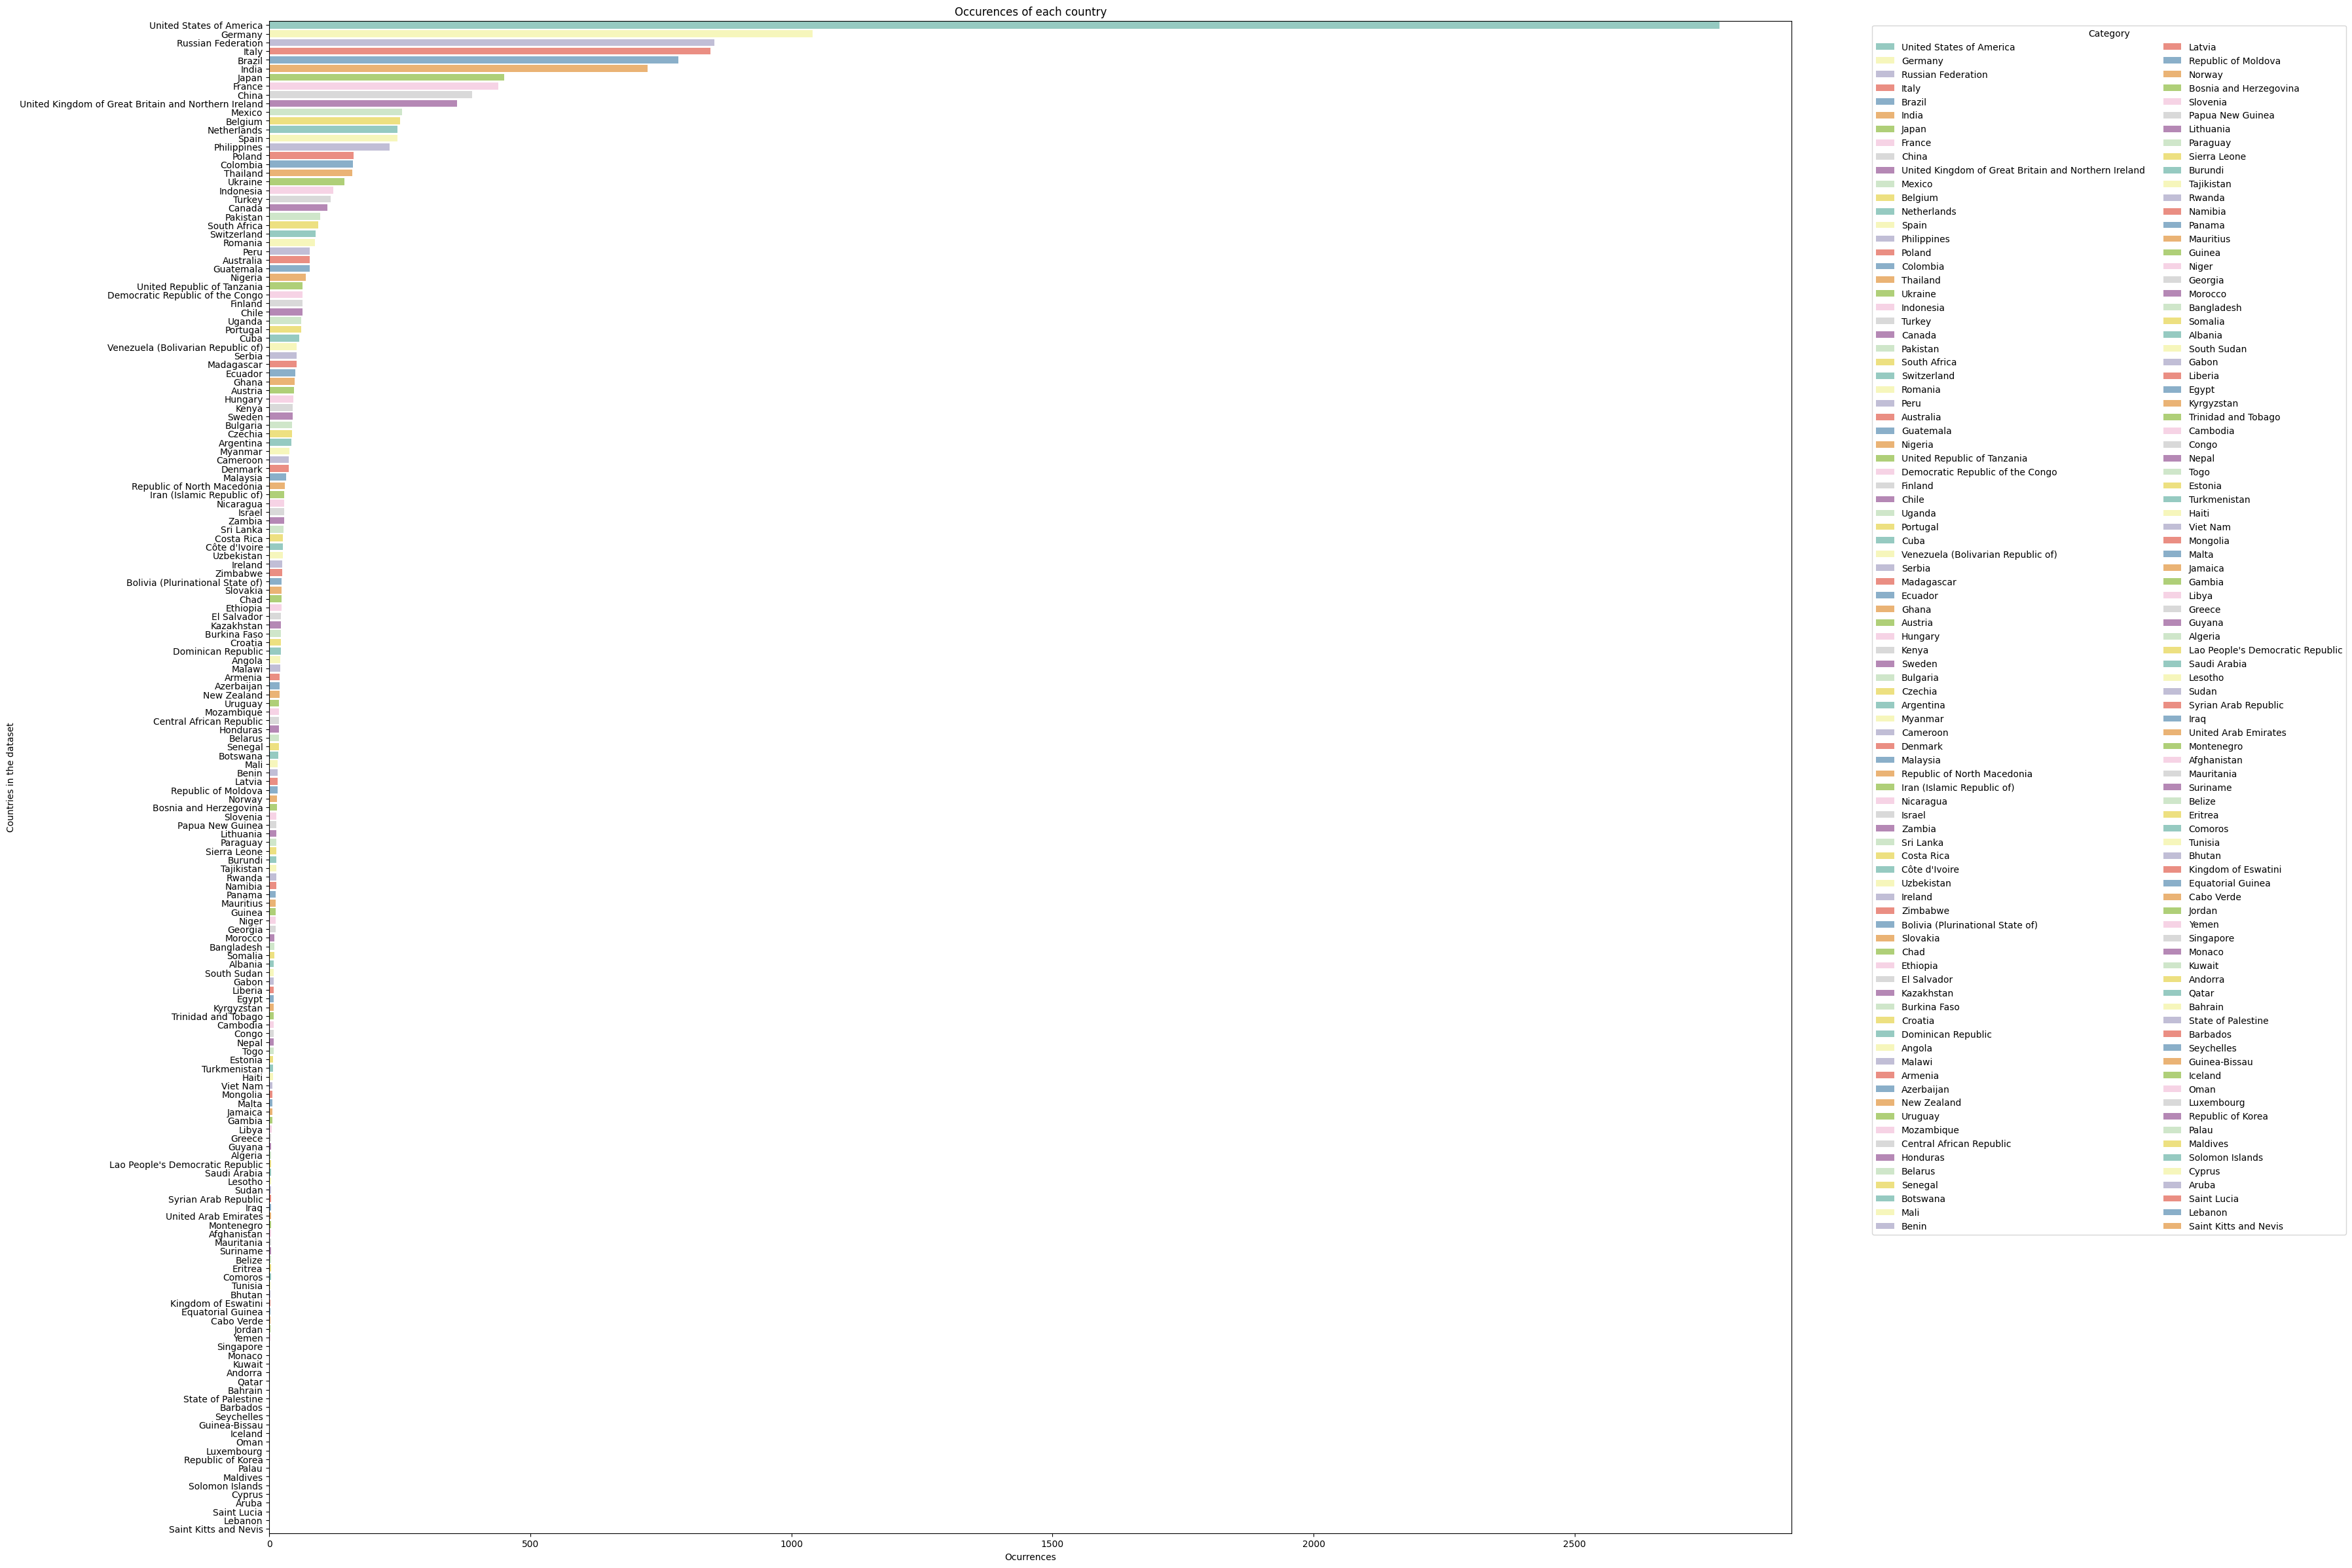

In [131]:
plt.figure(figsize=(30,30))
plt.title('Occurences of each country')
sns.barplot(values_count, y='Country', x='count', palette='Set3', hue='Country')
plt.xlabel ('Ocurrences')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.ylabel('Countries in the dataset')
plt.show()

We can prune the countries to the top 20 countries for better visualization

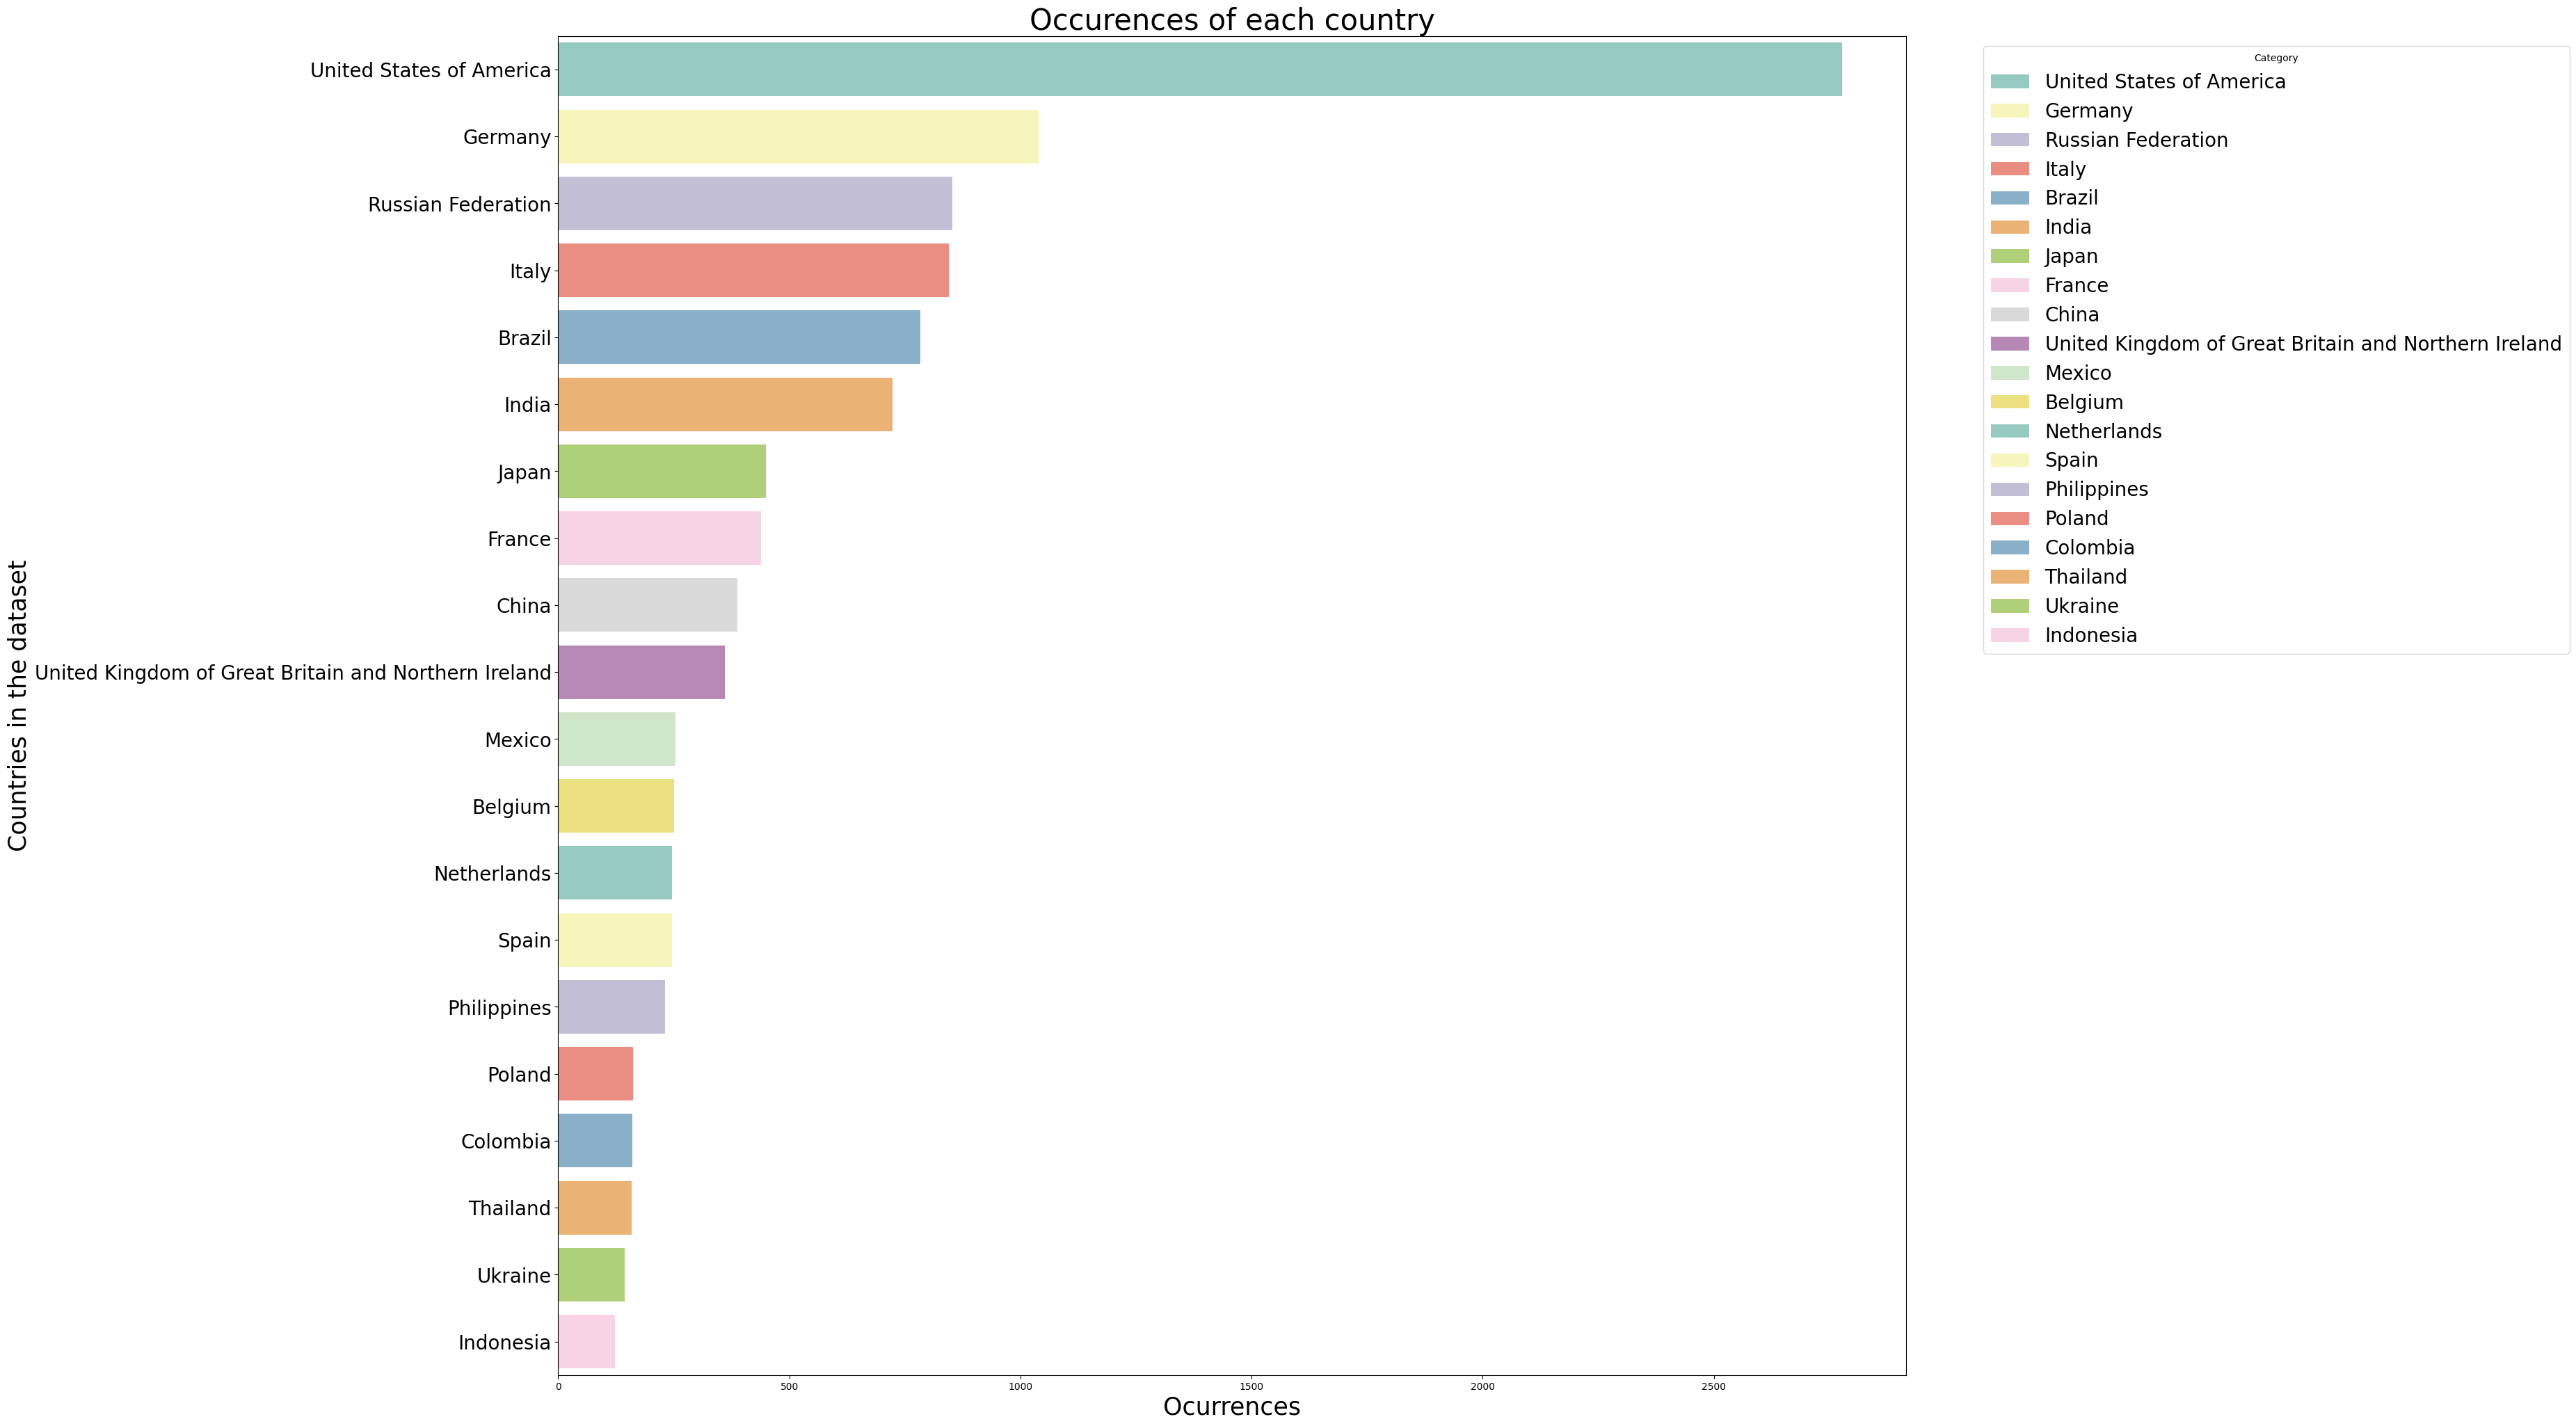

In [132]:
plt.figure(figsize=(25,25))
plt.title('Occurences of each country', fontsize=30)
sns.barplot(values_count[:21], y='Country', x='count', palette='Set3', hue='Country')
plt.xlabel ('Ocurrences', fontsize=25)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 20})
plt.ylabel('Countries in the dataset', fontsize=25)
plt.yticks(fontsize=20)
plt.show()

We notice that the countries with the biggest number of occurences in our dataset are : **The united states of America**, then **Germany**, **The Russian federation**, **Italy** then **Brazil**

In [133]:
averaged_countries = grouped_countries.agg(pl.col("AQI Value").mean()).sort(by='AQI Value', descending=True)
averaged_countries

Country,AQI Value
str,f64
"""Republic of Ko…",421.0
"""Bahrain""",188.0
"""Pakistan""",184.336735
"""Saudi Arabia""",166.25
"""Mauritania""",164.0
…,…
"""Bolivia (Pluri…",24.875
"""Iceland""",23.0
"""Maldives""",19.0


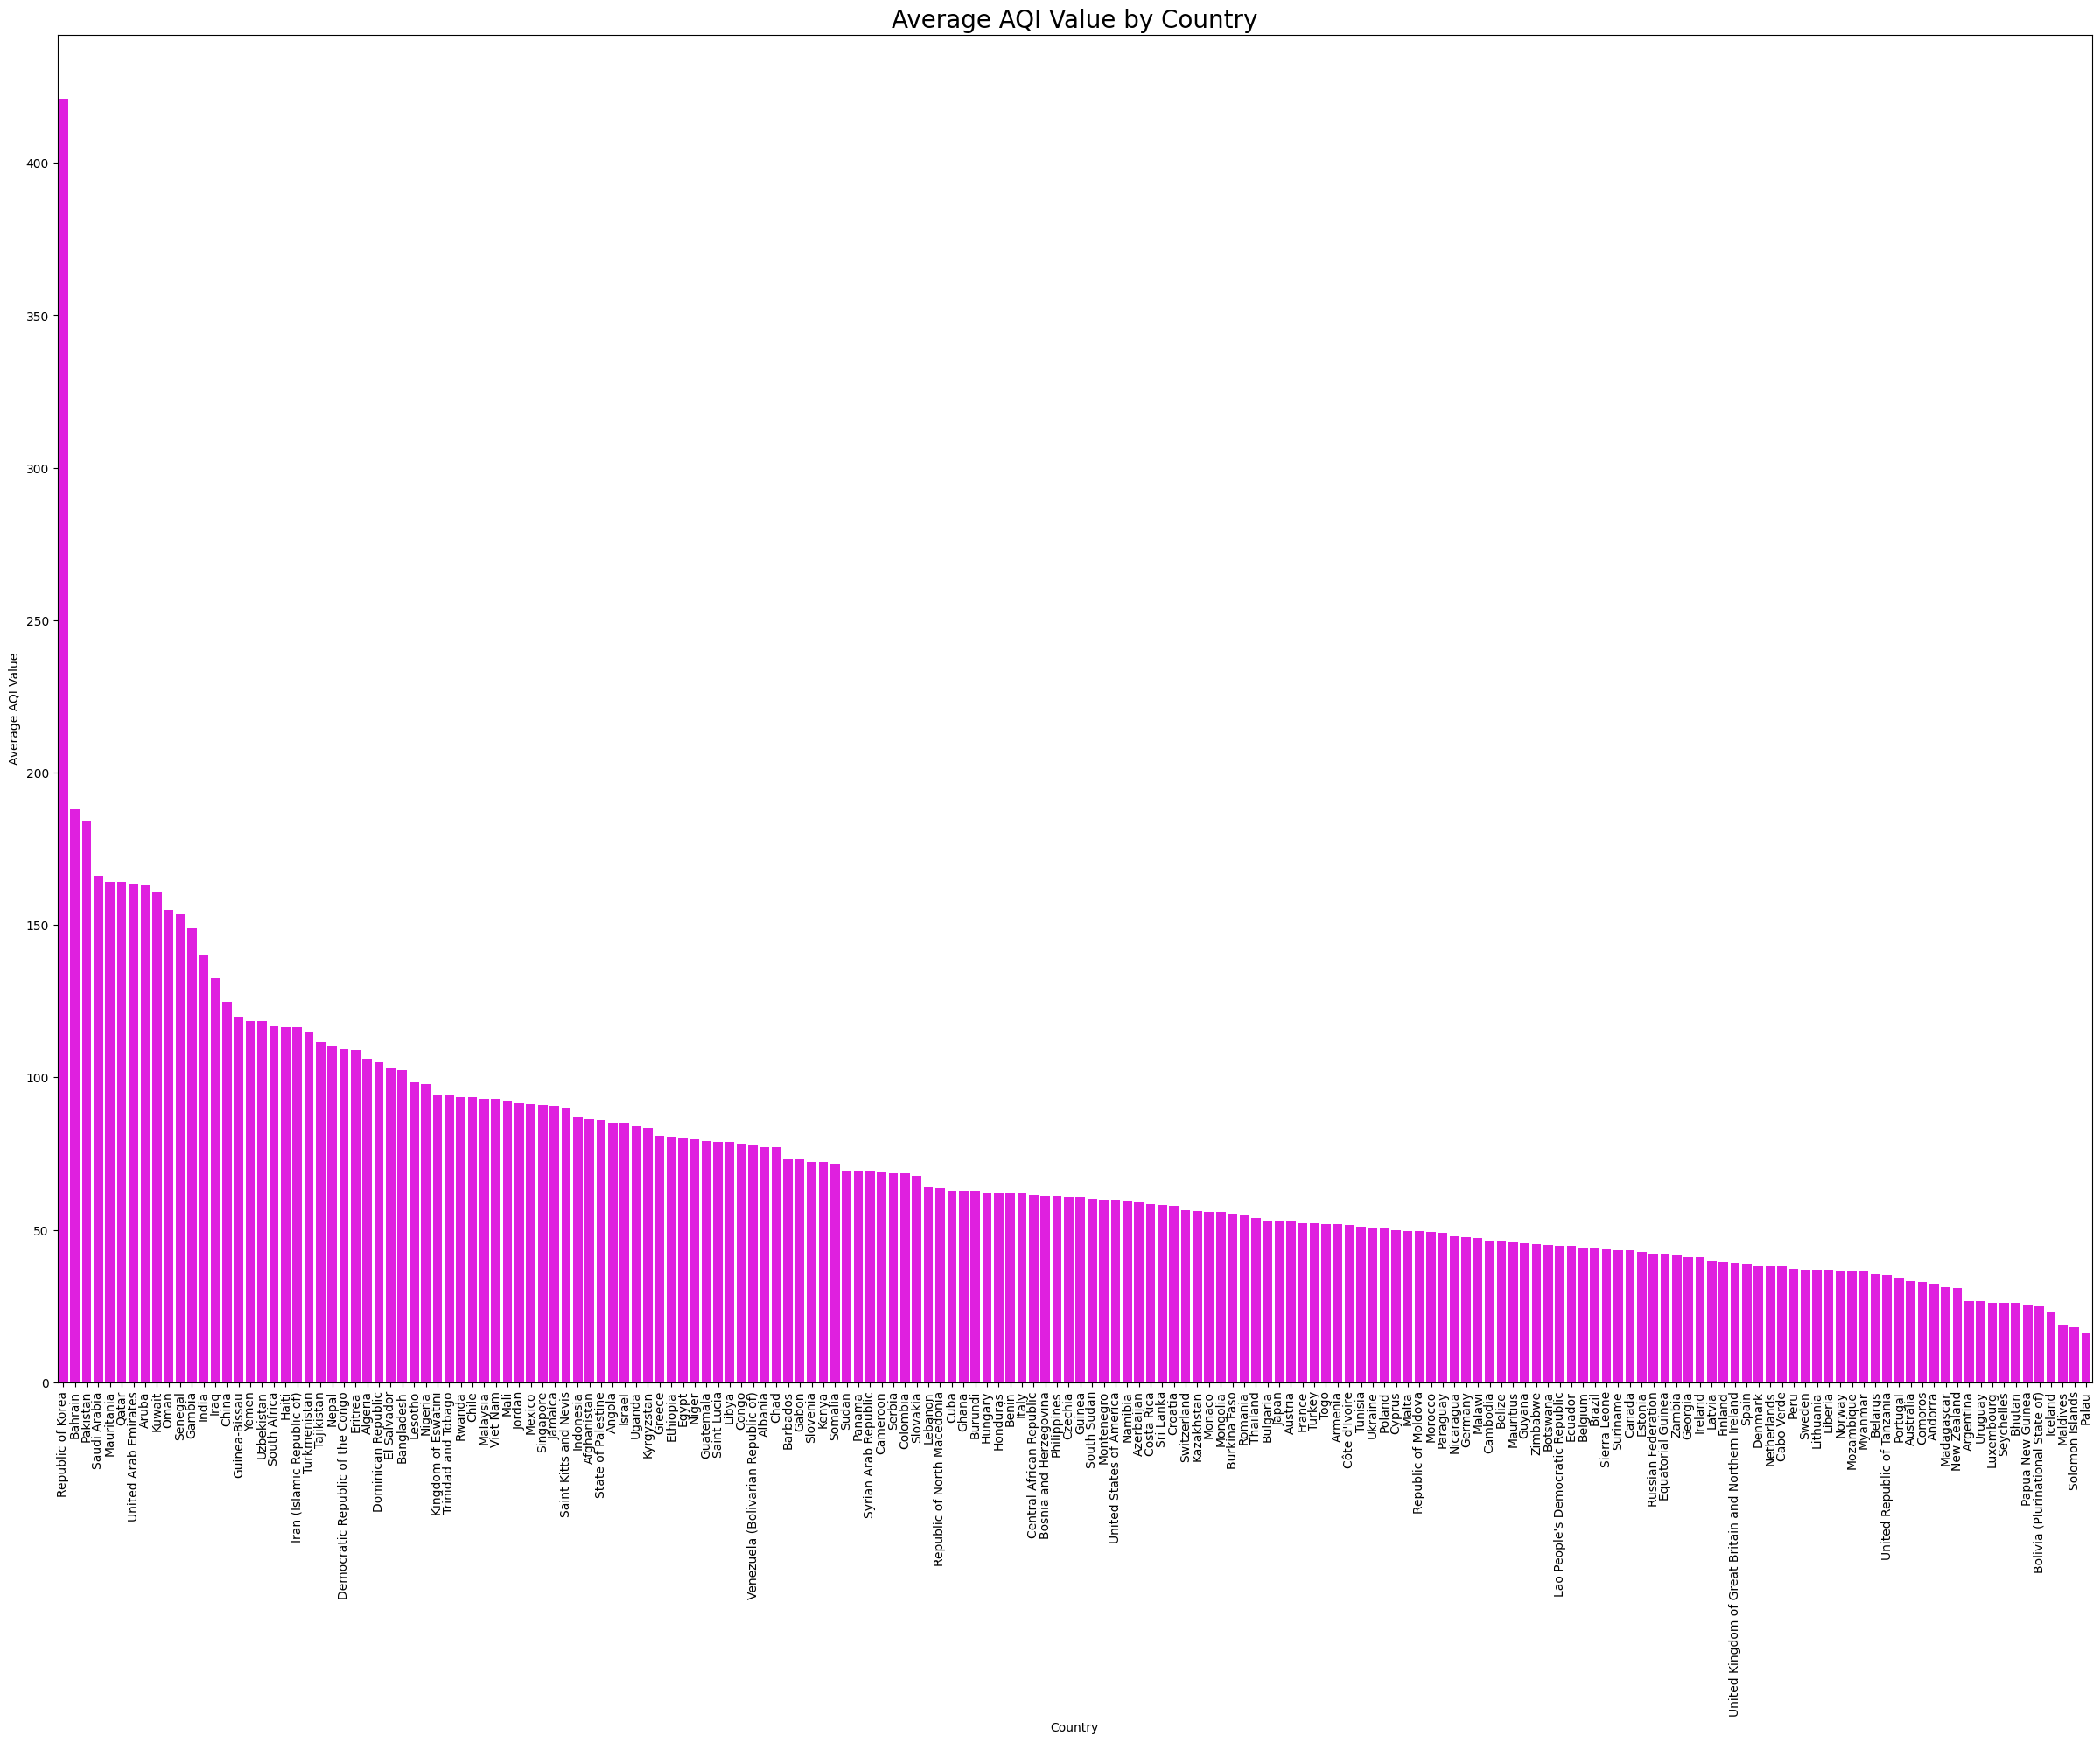

In [134]:
# Plotting the average AQI value for each country
plt.figure(figsize=(30, 20))
sns.barplot(data=averaged_countries, x="Country", y="AQI Value", color="magenta")
plt.title("Average AQI Value by Country", fontsize=20)
plt.xlabel("Country")
plt.ylabel("Average AQI Value")
plt.xticks(rotation=90)  # we rotate x-axis labels for better readability
plt.show()

We notice that the **Republic of Korea** has the biggest avergae value of the AQI reaching 421
But this is not highly significant because if we check Korea, we only have one occurence of it in just on city **Seoul** which happens to have the AQI value of 421

In [135]:
for country, content in grouped_countries:
    if country == "Republic of Korea":
        print(country)
        print(content)
        print("\n")

Republic of Korea
shape: (1, 14)
┌──────────────┬───────┬───────────┬──────────────┬───┬─────────────┬─────────────┬───────┬────────┐
│ Country      ┆ City  ┆ AQI Value ┆ AQI Category ┆ … ┆ PM2.5 AQI   ┆ PM2.5 AQI   ┆ lat   ┆ lng    │
│ ---          ┆ ---   ┆ ---       ┆ ---          ┆   ┆ Value       ┆ Category    ┆ ---   ┆ ---    │
│ str          ┆ str   ┆ i64       ┆ str          ┆   ┆ ---         ┆ ---         ┆ f64   ┆ f64    │
│              ┆       ┆           ┆              ┆   ┆ i64         ┆ str         ┆       ┆        │
╞══════════════╪═══════╪═══════════╪══════════════╪═══╪═════════════╪═════════════╪═══════╪════════╡
│ Republic of  ┆ Seoul ┆ 421       ┆ Hazardous    ┆ … ┆ 415         ┆ Hazardous   ┆ 37.56 ┆ 126.99 │
│ Korea        ┆       ┆           ┆              ┆   ┆             ┆             ┆       ┆        │
└──────────────┴───────┴───────────┴──────────────┴───┴─────────────┴─────────────┴───────┴────────┘




/tmp/ipykernel_270850/245177650.py:1: DeprecationWarning: `group_by` iteration will change to always return group identifiers as tuples. Pass `by` as a list to silence this warning, e.g. `group_by(['Country'])`.
  for country, content in grouped_countries:


In [143]:
aqi_categories = df['AQI Category'].value_counts()
aqi_categories

AQI Category,count
str,u32
"""Very Unhealthy…",120
"""Good""",6670
"""Moderate""",5872
"""Unhealthy""",773
"""Unhealthy for …",745
"""Hazardous""",49


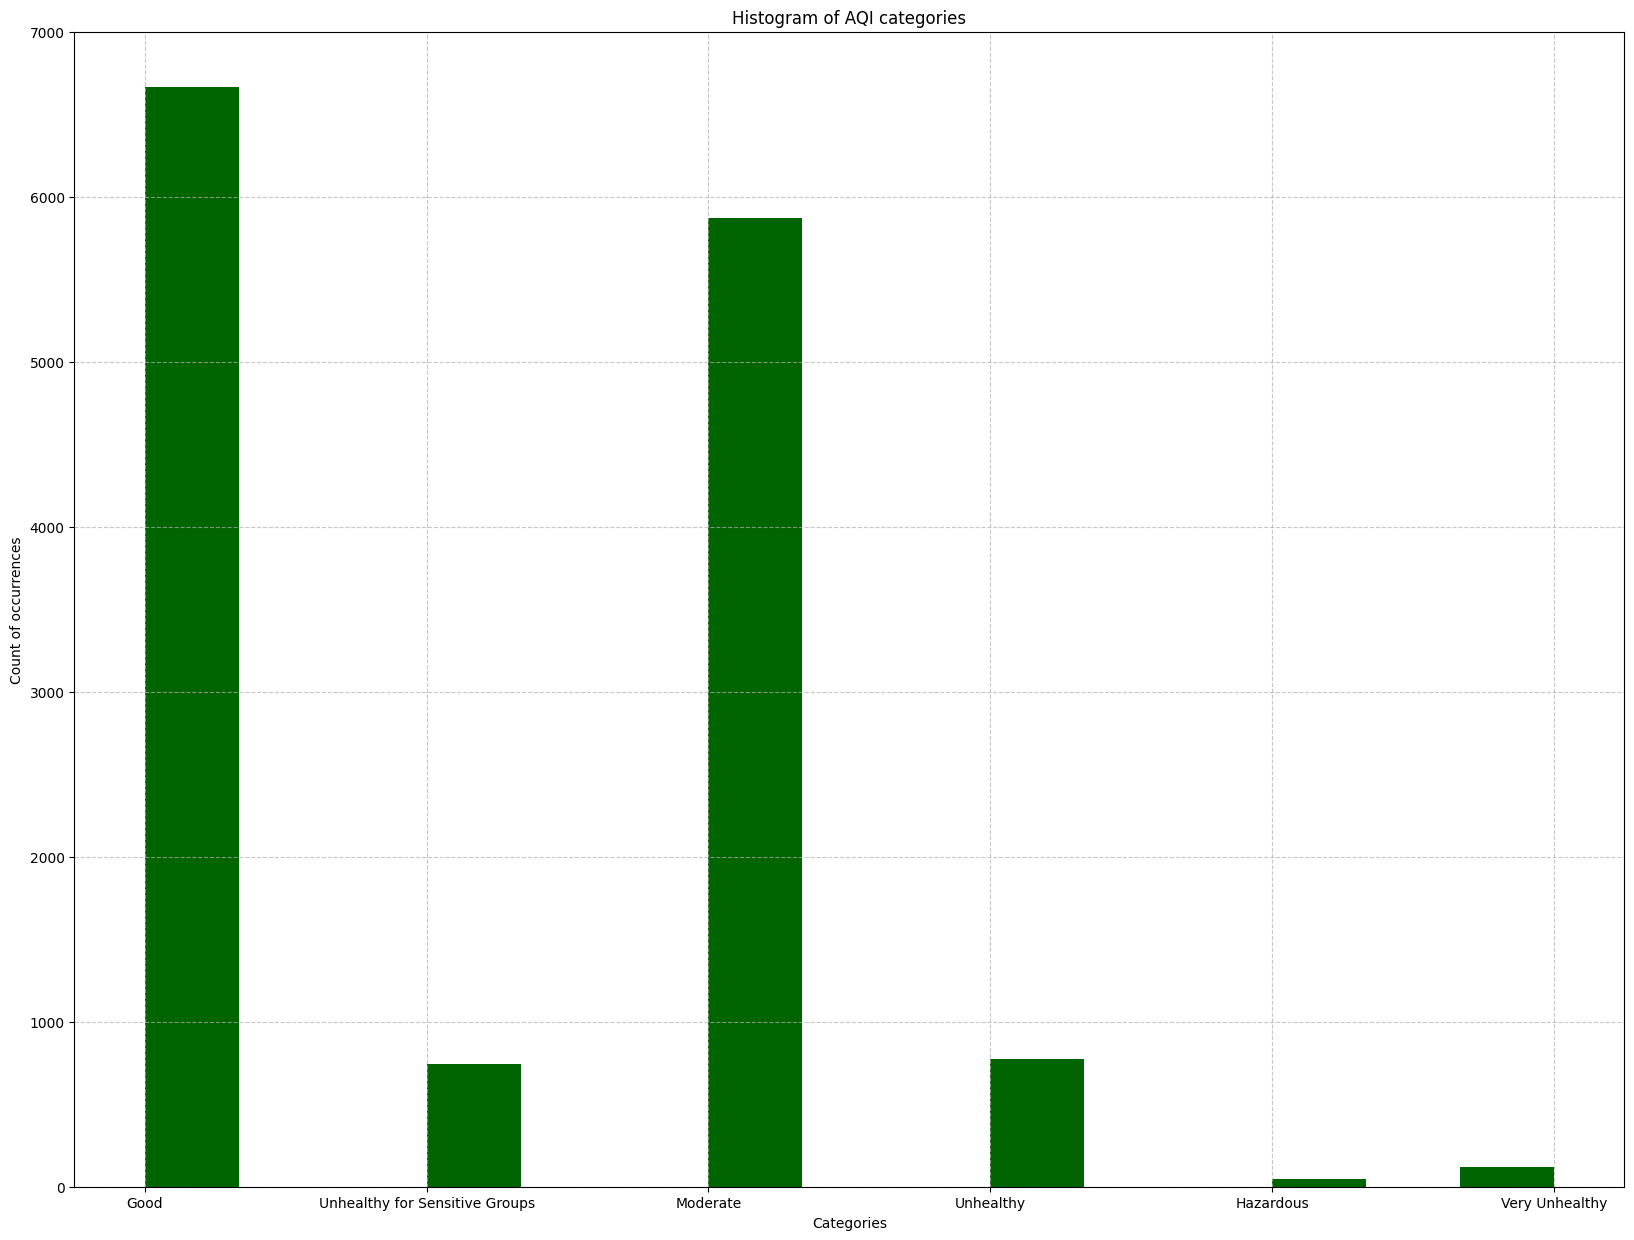

In [136]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 15))
plt.grid(True, linestyle="--", alpha=0.7)

num_bins = int(np.ceil(np.log2(len(df))) + 1)


plt.hist(df["AQI Category"], bins=num_bins, color="darkgreen", align="mid")

plt.title("Histogram of AQI categories")
plt.xlabel("Categories")
plt.ylabel("Count of occurrences")
plt.show()

In [137]:
%pip install pyarrow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


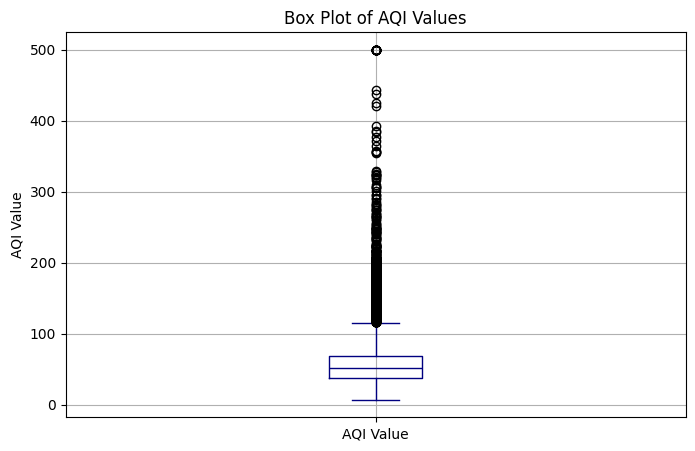

In [150]:
# Box plot of AQI values
plt.figure(figsize=(8, 5))
df.select("AQI Value").to_pandas().boxplot(grid=True, color='navy')
plt.title("Box Plot of AQI Values")
plt.ylabel("AQI Value")
plt.show()

In [151]:
plt.figure(figsize=(20,18))
sns.pairplot(df.to_pandas(), size=20, hue='AQI Category')
plt.show()

/home/wissem/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 2000x1800 with 0 Axes>

In [139]:
df.columns

['Country',
 'City',
 'AQI Value',
 'AQI Category',
 'CO AQI Value',
 'CO AQI Category',
 'Ozone AQI Value',
 'Ozone AQI Category',
 'NO2 AQI Value',
 'NO2 AQI Category',
 'PM2.5 AQI Value',
 'PM2.5 AQI Category',
 'lat',
 'lng']

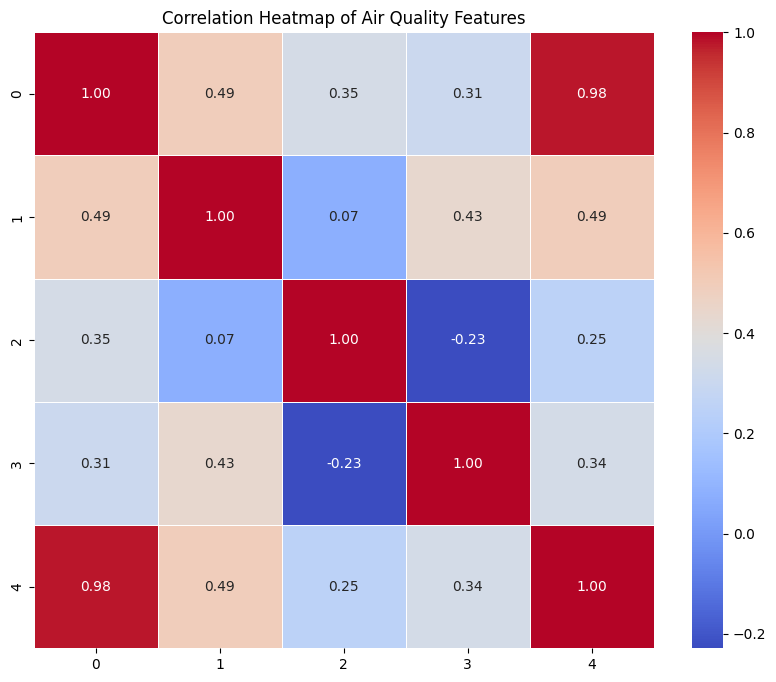

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt


# Selecting relevant columns for correlation analysis
selected_columns = [
    "AQI Value",
    "CO AQI Value",
    "Ozone AQI Value",
    "NO2 AQI Value",
    "PM2.5 AQI Value",
]
selected_df = df[selected_columns]

# Calculate the correlation matrix
corr = selected_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Air Quality Features")
plt.show()

### Identifying outliers

### Feature Engineering

In [141]:
df.columns

['Country',
 'City',
 'AQI Value',
 'AQI Category',
 'CO AQI Value',
 'CO AQI Category',
 'Ozone AQI Value',
 'Ozone AQI Category',
 'NO2 AQI Value',
 'NO2 AQI Category',
 'PM2.5 AQI Value',
 'PM2.5 AQI Category',
 'lat',
 'lng']